Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513/EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 5: SVM

Neste exercício você irá construir classificadores usando máquinas de vetores de suporte (SVM), tando em sua versão linear quanto na versão baseada em kernels. Também serão abordadas técnicas de validação cruzada para avaliação de desempenho e busca de hiperparâmetros.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from ipywidgets import interact

def plot_data(X, y, colors=['bo','rx','gs','md','c^','yP']):
    ''' Plot 1-D or 2-D classification dataset '''
    assert len(X.shape) == 2 and len(y.shape) == 1
    classes = np.unique(y)
    assert len(classes) <= len(colors)
    dim = X.shape[1]
    assert 0 < dim <= 2
    if dim == 1:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],np.zeros(np.sum(y==classes[i])),colors[i])
        plt.gca().axes.get_yaxis().set_ticks([])
    else:
        for i in range(len(classes)):
            plt.plot(X[y==classes[i],0],X[y==classes[i],1],colors[i])
    return

def plot_svm(model, X, heatmap=False, circles=True, N=100, gap=1e-9):
    ''' Plot decision regions for a 1-D or 2-D binary SVM classifier '''
    assert len(X.shape) == 2
    dim = X.shape[1]
    assert 0 < dim <= 2
    x1_min, x1_max = X[:,0].min()-gap, X[:,0].max()+gap
    if dim == 1:
        x2_min, x2_max = -1, 1
        N2 = 2
    else:
        x2_min, x2_max = X[:,1].min()-gap, X[:,1].max()+gap
        N2 = N
    xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,N), np.linspace(x2_min,x2_max,N2))
    if dim == 1:
        XX = np.c_[xx1.reshape(-1)]
    else:
        XX = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = model.decision_function(XX)
    assert len(z.shape) == 1
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
    if heatmap:
        a = np.max(np.abs(z))*2
        plt.contourf(xx1,xx2,z,100,cmap=plt.cm.bwr,vmin=-a,vmax=a)
    else:
        plt.contourf(xx1,xx2,z,cmap=plt.cm.bwr,vmin=-3,vmax=3,levels=[-1,0,1])
    if circles:
        S = X[model.support_]
        if dim == 1:
            S = np.c_[S, np.zeros(S.shape[0])]
        plt.plot(*S.T,'go',mfc='none',ms=12)
    return

# 1. Conjunto de dados #1

O primeiro conjunto de dados pode ser carregado pelo comando abaixo. Por hora, não usaremos conjunto de teste.

(100, 2) (100,)


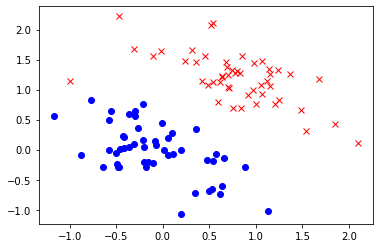

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=2, centers=[[0,0],[0,1]], cluster_std=0.2, random_state=14)
X = X @ np.array([[2, -2], [1, 1]])
X[52] = [-1, 1.15]
X_original = X.copy() # save for later
plot_data(X, y)
print(X.shape, y.shape)

Inicialmente treinaremos um SVM linear com $C=1$.

Train accuracy: 99.0%


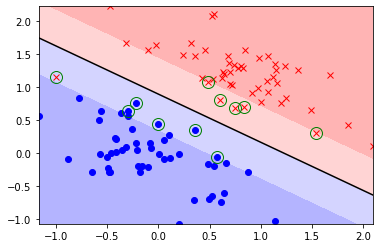

In [3]:
model = SVC(C=1, kernel='linear')
model.fit(X, y)
print('Train accuracy: {:.1%}'.format(model.score(X, y)))
plot_data(X, y)
plot_svm(model, X)

## SVM linear

Os círculos no gráfico acima marcam os **vetores de suporte**. Note que, no classificador SVM, o classificador é definido exclusivamente a partir dos vetores de suporte, i.e., as demais amostras de treinamento que satisfazem a margem não tem impacto no classificador.

1. Encontre os vetores de suporte, os índices dos vetores de suporte, e o vetor de coeficientes da solução dual ($\alpha_i y_s^{(i)}$), conforme fornecidos pelo modelo treinado.
1. A partir destes vetores, calcule matematicamente o vetor de pesos (da solução primal) $\bw$ e o termo de *bias* $b$, dados por
$$
\bw = \sum_{i \in \calS} \alpha_i y_s^{(i)} \bx^{(i)}
$$
onde $\calS$ denota o conjunto de índices dos vetores de suporte, e
$$
b = y_s^{(i^*)} - \bw^T \bx^{(i^*)}
$$
onde $i^* \in \calS$ denota qualquer índice tal que $0 < \alpha_{i^*} < C$. Em seguida, confirme que os valores que você calculou são iguais aos fornecidos pelo modelo treinado (o termo $b$ até a segunda casa decimal).

#### Dicas
- Reveja as equações nos slides da disciplina.
- Leia a documentação do SVC do sklearn em:
 - https://scikit-learn.org/stable/modules/svm.html#svc
 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Escala dos atributos

3. Ainda mantendo $C=1$, reescale os atributos conforme a célula abaixo e verifique o impacto no modelo treinado (reutilize o código da célula 3). Como você explica as diferenças?
1. A partir dos resultados observados, que recomendação você daria para o treinamento de um classificador SVM?

Ao final desta parte, **retorne os dados para a escala original**.

In [4]:
# Try each of them
#d = [0.1,10]
d = [1,1]
#d = [10,0.1]
X = X_original @ np.diag(d)

# Train and evaluation code go here

### Variando $C$

5. Com os dados de volta à escala original, varie o valor de $C$ (desde 0.1 ou menos até 100 ou mais) até obter 100% de acurácia.
1. Analise os resultados observados:
 1. O que acontece com a fronteira de decisão? Por quê? 
 1. Que interpretação pode ser dada para o parâmetro $C$? 
 1. O ajuste obtido parece ser adequado? Explique.

### Avaliação de desempenho via validação cruzada $k$-fold

Sabemos que o desempenho de treinamento não é em geral uma estimativa realista do desempenho de um modelo, devido à possibilidade de overfitting. No entanto, quando o conjunto de dados é pequeno, pode não ser interessante separar um conjunto de teste *hold-out*, porque mesmo este subconjunto de teste pode ainda ser muito pequeno para uma estimativa confiável. Por outro lado, se separarmos uma proporção grande para teste, estaremos reduzindo severamente o número de amostras de treinamento, possivelmente comprometendo o desempenho do modelo.

Nessa situação, um bom *tradeoff* entre a qualidade do modelo e a qualidade da estimativa de desempenho do modelo pode ser obtido (ao custo de maior esforço computacional) usando a abordagem conhecida como **validação cruzada $k$-fold**: particionar os dados em $k$ partes e realizar $k$ treinamentos e testes, sempre testando em uma das partes um modelo treinado com as partes restantes. A estimativa de desempenho é a média de todos os testes. A comparação entre o desempenho médio e o desempenho em cada fold nos fornece uma ideia da variabilidade/incerteza da estimativa.

Para aplicar essa abordagem você pode utilizar a função `sklearn.model_selection.cross_val_score`, definindo adequadamente o parâmetro `cv` (veja a documentação).

10. Para o valor de $C$ correspondente a 100% de acurácia de treinamento (obtido no item anterior), realize uma validação cruzada 5-fold e mostre os resultados obtidos para cada fold. Calcule também a média e o desvio padrão da acurácia sobre as 5 realizações. (Note que não é necessário treinar o modelo antes de aplicar a validação cruzada, pois o treinamento está implícito no método.)
1. Comente sobre os resultados observados. Em particular, esse parece ser um bom valor de $C$? Por quê?

**Obs:** Quando a validação cruzada $k$-fold é usada para selecionar hiperparâmetros (como faremos no próximo conjunto de dados), sua estimativa de desempenho torna-se menos confiável. (OPCIONAL) Por quê?

### (OPCIONAL)

Nesse exemplo, como dispomos da distribuição dos dados, podemos gerar um conjunto de teste (gigantesco) e avaliar o desempenho real do modelo para cada valor de $C$.

12. (OPCIONAL) Compare as acurácias de treinamento e de teste para os casos $C=1$ e $C=100$. A sua intuição sobre overfitting estava correta?

In [ ]:
X_test, y_test = make_blobs(n_samples=10000, n_features=2, centers=[[0,0],[0,1]], cluster_std=0.2, random_state=0)
X_test = X_test @ np.array([[2, -2], [1, 1]])

## SVM com kernel RBF (gaussiano)

Nesta parte você utilizará um kernel RBF para obter uma fronteira de decisão não-linear.

Em geral, um kernel pode ser interpretado como uma função que mede a **similaridade** entre um par de amostras ($x^{(i)}$, $x^{(j)}$). No caso do kernel RBF, a similaridade é definida como uma função da distância euclidiana entre as amostras, mais precisamente:

$$ K_{\text{RBF}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \gamma \| x^{(i)} - x^{(j)}\|^2 \right) $$

O parâmetro $\gamma$ (um **hiperparâmetro** do modelo) determina quão rápido a similaridade decai com a distância.

Em contraste, o kernel linear não possui hiperparâmetros, sendo definido simplesmente como o produto interno entre amostras:

$$ K_{\text{linear}} \left( x^{(i)}, x^{(j)} \right) = {x^{(i)}}^T x^{(j)} $$

O uso do kernel linear resulta no classificador linear visto anteriormente.

Em qualquer caso, a função de decisão (score de confiança) é dada por
$$
z = \bw^T \bx + b =b + \sum_{i \in \calS} \alpha_i y_s^{(i)} K(\bx^{(i)},\bx)
$$
onde $\calS$ denota o conjunto de índices dos vetores de suporte. Portanto, a predição é realizada calculando o kernel somente com relação aos vetores de suporte, i.e., apenas a similaridade com relação aos vetores de suporte é relevante.

### Usando o kernel da biblioteca

13. Refaça a classificação utilizando o kernel `rbf` fornecido na própria função `SVC`, definindo e variando o parâmetro `gamma`. Para isso, complete o código fornecido abaixo. Considere um valor muito alto para $C$ (no mínimo `C = 1e8`), correspondendo a um problema praticamente sem regularização, e mantenha-o fixo, o que vai permitir melhor compreender o efeito do parâmetro $\gamma$.
1. Ao variar $\gamma$, o que você observa? Como você interpreta o efeito deste parâmetro?

#### Dicas
- É recomendável variar $C$ e $\gamma$ de forma exponencial, uma vez que estes assumem valores típicos em uma faixa muito ampla. Isso pode ser implementado, por exemplo, variando $\log_{10} C$ ou $\log_{10} \gamma$ em escala linear.
- A opção `heatmap` na função `plot_svm` é útil para visualização: as regiões mais vermelhas representam um valor de $z$ (discriminante ou função de decisão) mais positivo, enquanto as regiões mais azuis representam um valor de $z$ mais negativo; no entanto, a margem deixa de ser mostrada.

In [ ]:
@interact(log10C=(-6,9,0.5), log10gamma=(-6, 3, 0.1))
def _(log10C=8, log10gamma=-6):
    C = 10**log10C
    gamma = 10**log10gamma
    model = ???
    model.fit(X, y)
    print('Train accuracy: {:.1%}'.format(model.score(X, y)))
    plt.title('C = {:g}, γ = {:g}'.format(C, gamma))
    plot_data(X, y)
    plot_svm(model, X, heatmap=True)

### (OPCIONAL) Implementando seu próprio kernel

15. (OPCIONAL) Em seguida, implemente o seu próprio kernel RBF usando a função `my_kernel` definida abaixo. Como exemplo, está implementado um kernel linear. 

O kernel customizado pode ser usado na função SVC através do comando:

```python
model = SVC(C=1, kernel=my_kernel)
```

Nesse caso, o parâmetro `gamma` deve ser definido como variável global (externa à função), para que você possa variá-lo, uma vez que a biblioteca sklearn não permite passar argumentos adicionais para a função de kernel customizado (em particular, o parâmetro `gamma` do `SVC` é ignorado para qualquer kernel customizado).

Alternativamente, você pode definir a função de kernel usando uma função anônima:

```python
model = SVC(C=1, kernel=lambda X1, X2: my_kernel(X1,X2,gamma))
```

e definir `gamma` como um argumento adicional de `my_kernel`.

In [5]:
def my_kernel(X1, X2):
    '''
    Computes custom kernel.
    
    Parameters
    ----------
    X1 : array of shape (m1, n_features)
    X2 : array of shape (m2, n_features)
    
    Returns
    -------
    kernel_matrix : array of shape (m1, m2)
    
    '''
    
    kernel_matrix = X1 @ X2.T
    
    return kernel_matrix

Certifique-se que sua implementação está correta rodando o código abaixo.

In [6]:
from sklearn.metrics.pairwise import rbf_kernel
X1 = np.random.randn(2,4)
X2 = np.random.randn(3,4)
gamma = 1/8
sim = my_kernel(X1, X2)
sim2 = rbf_kernel(X1, X2, gamma=gamma)
if abs(sim - sim2).sum() < 1e-10: print('OK')

OK


16. (OPCIONAL) Em seguida, realize novamente a classificação para obter o mesmo resultado anterior.

Após conseguir implementar corretamente um kernel RBF, **você pode voltar a usar o kernel da própria função SVC** (o qual tem provavelmente uma implementação mais eficiente).

# 2. Conjunto de dados #2

O próximo conjunto de dados pode ser carregado pelo comando abaixo. Para fins didáticos, o conjunto de validação tem o mesmo tamanho do conjunto de treinamento e o conjunto de teste é extremamente grande.

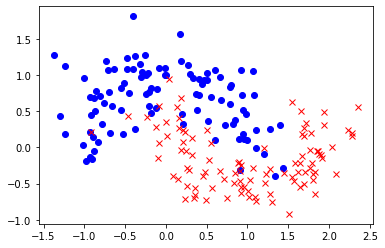

In [7]:
from sklearn.datasets import make_moons
np.random.seed(2019*2)
X, y = make_moons(n_samples=200, noise=0.25)
X_val, y_val = make_moons(n_samples=200, noise=0.25)
X_test, y_test = make_moons(n_samples=10000, noise=0.25)
plot_data(X, y)

## Variando hiperparâmetros

Aqui continuaremos utilizando um classificador SVM com kernel RBF.

1. Para "aquecer" e ganhar algum *insight* sobre o problema, comece analisando algumas configurações de hiperparâmetros $(C, \gamma)$ de forma exploratória, **sem utilizar o conjunto de validação**, apenas para visualizar o seu efeito na fronteira de decisão. Tente encontrar uma configuração que, na sua opinião, forneça uma explicação aparentemente mais "natural" possível para os dados. (Dica: utilize o mesmo código do item 1.10)

## Busca de hiperparâmetros: Grid search + Validação hold-out

Agora, sua tarefa é determinar a melhor configuração de hiperparâmetros de acordo com o desempenho no conjunto de validação. Em outras palavras, você deve variar $C$ e $\gamma$, sempre treinando o modelo no conjunto de treinamento e medindo o desempenho no conjunto de validação, até encontrar os valores que maximizam a acurácia de validação.

Para isso, você pode definir uma lista de valores de $C$ (digamos, `list_C`) e uma lista de valores de $\gamma$ (digamos, `list_gamma`), e variar $(C,\gamma)$ dentro da grade `list_C` x `list_gamma` (este método é conhecido como [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search)), o que a princípio poderia ser implementado com dois laços `for`. No entanto, para facilitar, usaremos a função `grid_search` fornecida abaixo, a qual internamente utiliza a função `GridSearchCV` da biblioteca `sklearn`, com a opção `cv=PredefinedSplit()`.

2. Utilize a função `grid_search` fornecida abaixo para encontrar os melhores valores de $C$ e $\gamma$.
1. Em seguida, para os valores encontrados, treine novamente o modelo, trace o gráfico da região de decisão (com o conjunto de treinamento) e determine a acurácia nos conjuntos de treinamento, validação e teste.

#### Dicas

- A escolha fornecida abaixo para `param_grid` é apenas um (mau) exemplo! Certifique-se de usar valores mais interessantes.
- Como mencionado anteriormente, para ambos $C$ e $\gamma$, é recomendável utilizar valores que sigam uma progressão geométrica, i.e., regularmente espaçados no expoente. 
- A função `np.logspace` pode ser útil.
- Se o melhor valor encontrado para um hiperparâmetro está na extremidade da faixa de busca, é recomendável estender a faixa.
- É possível atingir 96% de acurácia de validação.

In [10]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
def grid_search(model, param_grid, X_train, y_train, X_val, y_val):
    val_index = [-1]*len(X_train) + [0]*len(X_val)
    gs = GridSearchCV(model, param_grid, refit=False, cv=PredefinedSplit(val_index))
    gs.fit(np.r_[X_train, X_val], np.r_[y_train, y_val])
    return gs.best_params_

In [11]:
# Example:
param_grid = {'C':[0.001, 0.003, 0.01], 'gamma':[0.001, 1000]} # not a very good choice!
# This will try the following sets of parameters:
# [{'C': 0.001, 'gamma': 0.001},
#  {'C': 0.001, 'gamma': 1000},
#  {'C': 0.003, 'gamma': 0.001},
#  {'C': 0.003, 'gamma': 1000},
#  {'C': 0.01, 'gamma': 0.001},
#  {'C': 0.01, 'gamma': 1000}]

best_params = grid_search(SVC(kernel='rbf'), param_grid, X, y, X_val, y_val)
print(best_params)

C, gamma = best_params['C'], best_params['gamma']

{'C': 0.001, 'gamma': 0.001}


## Busca de hiperparâmetros: Grid search + Validação cruzada $k$-fold

Agora, suponha que você não possui ou não deseja separar um conjunto de validação (*hold-out*) como feito acima. Isto é, assuma que `X_val` e `y_val` não existem. Ainda assim é possível obter uma boa estimativa de desempenho---sem usar o conjunto de teste---e utilizá-la para a escolha de hiperparâmetros, utilizando validação cruzada $k$-fold (conforme feito no item 1.7). Esta estimativa pode ser combinada, por exemplo, com uma busca em grade para determinação de hiperparâmetros; em outras palavras, para cada configuração de hiperparâmetros da grade fornecida, deve-se realizar uma validação cruzada $k$-fold para estimativa de desempenho daquela configuração.

A princípio, isto poderia ser implementado através de laços `for` (para busca em grade) combinados com a função `cross_val_score` para estimativa de desempenho. No entanto, para facilitar, vamos diretamente utilizar a biblioteca `sklearn`, a qual já possui uma implementação eficiente da busca em grade com validação cruzada, mais precisamente a função `sklearn.model_selection.GridSearchCV`. Essa abordagem é, na verdade, a forma mais comum de uso desta função (ao contrário da abordagem do item anterior).

4. Realize uma busca de hiperparâmetros através de *grid search* com validação cruzada 5-fold. Lembre-se que você vai usar somente o conjunto de treinamento.
1. Para a melhor configuração encontrada, determine a média e o desvio padrão da acurácia ao longo das 5 folds. (Dica: não é necessário treinar e testar novamente com `cross_val_score`; os resultados da `GridSearchCV` podem ser acessados usando as propriedades `.cv_results_` e `.best_index_`)
1. Para a melhor configuração encontrada, treine novamente o modelo usando todo o conjunto de treinamento, trace o gráfico da região de decisão (com o conjunto de treinamento) e determine a acurácia nos conjuntos de treinamento e teste (lembre que não existe mais conjunto de validação separado).
1. Comente sobre os resultados observados. Em particular, comente sobre o desempenho obtido nas duas abordagens de validação (hold-out e k-fold).

#### Dicas

- Estude a documentação da função `GridSearchCV`.
- Para utilizar a função `GridSearchCV` você precisará definir o argumento `param_grid`. Por exemplo (lembre-se que este é um mau exemplo):

```
param_grid = {'C':[0.001, 0.003, 0.01], 'gamma':[0.001, 1000]}
```

- A opção `refit=True` permite utilizar o próprio objeto `gs = GridSearchCV()` como classificador, com funções `predict`, `score`, etc. No entanto, isso pode causar confusão. Inicialmente, é recomendável usar a função apenas para encontrar os melhores hiperparâmetros e então treinar separamente o modelo no conjunto de treinamento. Por garantia, utilize `refit=False`.
- Se quiser remover os círculos ao redor dos vetores de suporte na função `plot_svm`, utilize a opção `circles=False`.

In [12]:
del X_val, y_val # just in case

## (OPCIONAL) Experimentando outros kernels

8. (OPCIONAL) Experimente outros kernels de forma exploratória (usando `ipywidgets.interact`), como `kernel='poly'` e `kernel='sigmoid'`.

#### Dicas
- Para kernel polinomial, defina os parâmetros `degree=d`, `gamma='auto'`, `coef0=1` e varie `C` e `d`.
- Para algumas configurações de hiperparâmetros (ex: valores altos de `d`), estes kernels alternativos podem levar um tempo excessivo para treinamento, sendo necessário interromper ou reiniciar o interpretador. Para este conjunto de dados, é razoável que o treinamento leve no máximo alguns segundos.

# 3. Conjunto de dados #3

O último conjunto de dados consiste de mensagens sobre tópicos diferentes e a tarefa consiste em identificar o tópico correspondente a cada mensagem. O conjunto completo possui 20 categorias; para uma classificação binária, utilizaremos apenas duas. Mais informações sobre o conjunto de dados podem ser encontradas em:

https://scikit-learn.org/stable/datasets/index.html#the-20-newsgroups-text-dataset

O conjunto de dados pode ser carregado pelos comandos abaixo.

In [13]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med','soc.religion.christian']
remove = ['headers','footers','quotes']
data_train = fetch_20newsgroups(subset='train',categories=categories, remove=remove)
data_test = fetch_20newsgroups(subset='test',categories=categories, remove=remove)
categories = data_train['target_names'] # just in case it gets reversed
msg = data_train['data']
y = data_train['target']
msg_test = data_test['data']
y_test = data_test['target']

In [14]:
# A few samples
for i in [9,8]:
    print('\ny = %d (%s)\n-----' % (y[i],categories[y[i]]))
    print(msg[i],'\n')


y = 0 (sci.med)
-----
I am currently doing a group research project on the drug Xanax.  I would
be exponentially gracious to receive any and all information you could
provide
me regarding its usage, history, mechanism of reaction, side effects, and
other pertinent information.  I don't care how long or how short your 
response is. 


y = 1 (soc.religion.christian)
-----

I have no doubt that God hears everybody's prayers.
However, He does things His way, i.e. things will happen
only if it is His will.

Now if the question really is "Does God grant everybody's wishes ?"
then you'll get a brutal shot of reality similar to when you didn't
get that toy you wanted for Christmas. You just cannot expect
to get everything you want in this world.

--  



## Pré-processamento dos dados

Para converter texto em vetores numéricos, utilizaremos o modelo _bag-of-words_ (BoW). Leia a seção 4.6-4.6.1 do livro do Watt para se familiar com este conceito.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
prep = make_pipeline(CountVectorizer())
X = prep.fit_transform(msg)
X_test = prep.transform(msg_test)
voc = prep.steps[0][1].vocabulary_
inv_voc = {i: v for v, i in voc.items()}

print(voc['research'])
print(inv_voc[15704])
print(X[9].sorted_indices())

15704
research
  (0, 1670)	1
  (0, 1750)	1
  (0, 1837)	2
  (0, 1970)	1
  (0, 2680)	1
  (0, 3566)	1
  (0, 4933)	1
  (0, 5199)	1
  (0, 6202)	1
  (0, 6221)	1
  (0, 6344)	1
  (0, 6552)	1
  (0, 7284)	1
  (0, 8443)	1
  (0, 8559)	1
  (0, 9056)	1
  (0, 9204)	2
  (0, 9773)	2
  (0, 10175)	1
  (0, 10230)	1
  (0, 11238)	1
  (0, 11708)	1
  (0, 11743)	1
  (0, 13074)	1
  (0, 13147)	1
  (0, 13233)	1
  (0, 13330)	1
  (0, 13891)	1
  (0, 14706)	1
  (0, 14820)	1
  (0, 15204)	1
  (0, 15273)	1
  (0, 15434)	1
  (0, 15704)	1
  (0, 15775)	1
  (0, 16830)	1
  (0, 16876)	1
  (0, 18423)	1
  (0, 18658)	1
  (0, 19478)	1
  (0, 20317)	1
  (0, 20376)	1
  (0, 20456)	1
  (0, 20463)	1


## Classificação com SVM linear

Para este exercício você usará apenas um SVM linear. Nesse caso, **não utilize a função `SVC` do sklearn**. Ao invés disso, utilize a função `LinearSVC`, a qual possui uma implementação otimizada para SVM linear.

1. Treine um SVM linear e encontre os melhores hiperparâmetros (no caso, apenas $C$). Para avaliar o modelo, calcule a acurácia sobre o conjunto de treinamento utilizando validação cruzada 5-fold.
1. Após a escolha de hiperparâmetros, treine o modelo sobre todo o conjunto de treinamento e calcule a acurácia no conjunto de teste (hold-out).

#### Dicas
- Você pode usar a função `cross_val_score` e experimentar manualmente cada valor de $C$ ou simplesmente usar a função `GridSearchCV`.
- Ignore eventuais *warnings* sobre convergência do treinamento, que muito provavelmente correspondem a uma má escolha de $C$.

## Aprimorando o modelo

Agora, aprimore o modelo para conseguir pelo menos 94% de acurácia na validação cruzada 5-fold.

3. Para aprimorar o modelo, considere, por exemplo, o escalonamento dos atributos. Faz sentido, por exemplo, usar um `StandardScaler`, considerando que $X$ é uma matriz esparsa? Ou faria mais sentido normalizar os atributos internamente a cada amostra? Esta última operação pode ser feita por qualquer das funções abaixo:
```python
sklearn.preprocessing.Normalizer
sklearn.feature_extraction.text.TfidfTransformer(use_idf=False)
```
Explique o seu raciocínio e os resultados observados.
1. Estude a documentação dos transformadores `CountVectorizer` e `TfidfTransformer` e veja se consegue atingir o desempenho desejado. (Dica: experimente `use_idf=True`.)
1. Em seguida, treine o modelo no conjunto de treinamento completo e meça a acurácia no conjunto de teste.

## Realizando predições

Daqui para a frente não é necessário mais realizar treinamentos, apenas utilizar o modelo já treinado para realizar predições.

6. Determine a predição fornecida pelo seu modelo para os seguintes exemplos (retirados da Wikipedia):

```
A vaccine is a biological preparation that provides active acquired immunity to a particular disease.
```

```
Baptism is the ritual act, with the use of water, by which a person is admitted to membership of the Church. Beliefs on baptism vary among denominations.
```

## Preditores mais importantes

Como o modelo é um classificador linear, podemos determinar quais atributos são mais relevantes para a classificação analisando o vetor de pesos $\bw$.

7. Determine os 5 vocábulos mais preditivos de cada classe (i.e., 10 no total).
1. Quantos atributos são considerados (pelo modelo) absolutamente irrelevantes para a classificação?

# (OPCIONAL)

- Aplique um classificador SVM em outros conjuntos de dados, como por exemplo:
 - https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
 - https://scikit-learn.org/stable/datasets/index.html#olivetti-faces-dataset
 - https://archive.ics.uci.edu/ml/datasets/spambase